<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl2.png">


# ✋ MediaPipe Hands

**MediaPipe Hands** es un modelo de **detección y seguimiento de manos en tiempo real**. Utiliza una combinación de redes neuronales para identificar **21 puntos clave** en cada mano y proporciona una representación estructural útil para diversas aplicaciones.  


## ¿Cómo funciona MediaPipe Hands?  
El modelo opera en dos fases principales:  

**Detección de la mano** → Encuentra la posición de la mano en la imagen.  
**Estimación de los puntos clave** → Predice la ubicación de los **21 landmarks** en la mano detectada.  

MediaPipe Hands puede detectar **una o ambas manos** y permite realizar gestos, seguimiento de movimientos y control por gestos en aplicaciones interactivas.  



##  Puntos clave de la mano en MediaPipe Hands  
Cada mano detectada tiene **21 puntos clave** numerados de la siguiente manera:  

**Puntos principales**  
- **0** → Muñeca  
- **1-4** → Pulgar  
- **5-8** → Índice  
- **9-12** → Medio  
- **13-16** → Anular  
- **17-20** → Meñique 



## Opciones de configuración 

#### STATIC_IMAGE_MODE (POR DEFECTO FALSE) 
Puede tener valores de True o False. Cuando se le asigna False, entonces trata a las imágeness de entrada como un videostream, de tal manera que aplica el modelo de detección de palma y el modelo hand landmarks en un principio, pero luego realiza tracking para obtener la nueva ubicación de la mano, basándose en los puntos de referencia. De este modo, solo se invocará nuevamente al detector de palmas cuando no se hayan identificado los 21 puntos. 

Cuando se le asigna True, entonces los detectores estarán aplicádose en cada imagen, por lo que es mejor usarla en caso de que se trate de imágenes que no tengan que ver entre sí. 

####  MAX_NUM_HANDS (POR DEFECTO 2) 
Número máximo de manos por detectar. 

####  MIN_DETECTION_CONFIDENCE (POR DEFECTO 0.5) 
Valor mínimo de confianza del modelo de detección de manos, para que la detección sea considerada como exitosa. Sus valores comprenden de 0 a 1. 

####  MIN_TRACKING_CONFIDENCE (POR DEFECTO 0.5) 
Valor mínimo de confianza del modelo de rastreo de los landmark, para que el rastreo de los 21 puntos sea considerado como exitoso. En caso de no serlo, se invocará al detector de manos en la siguiente imagen. 
Este es ignorado si static_image_mode está en True. 


* https://developers.google.com/mediapipe/solutions/vision/hand_landmarker
* https://mediapipe.readthedocs.io/en/latest/solutions/hands.html

<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/hand-landmarks.png">

In [1]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2
import mediapipe as mp

I0000 00:00:1758814525.371175   19265 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1758814525.374780   19317 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1758814525.407378   19310 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758814525.429158   19306 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758814525.445985   19305 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


Handedness: [classification {
  index: 0
  score: 0.971796393
  label: "Left"
}
]


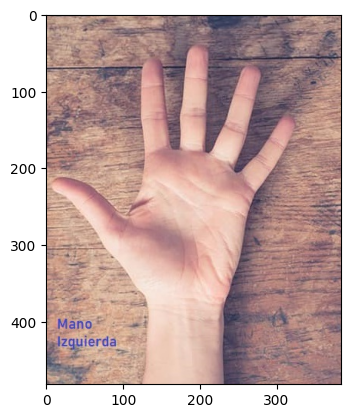

In [2]:
drawing = mp.solutions.drawing_utils
hands = mp.solutions.hands

with hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
    image = cv2.imread('figuras/mano_izquierda.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = hands.process(cv2.flip(image, 1))
    print('Handedness:', results.multi_handedness)   
    plt.imshow(image)
    plt.show()

    

I0000 00:00:1758814525.790020   19265 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1758814525.791891   19338 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
W0000 00:00:1758814525.822670   19329 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758814525.843864   19330 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Handedness: [classification {
  index: 1
  score: 0.948650599
  label: "Right"
}
]


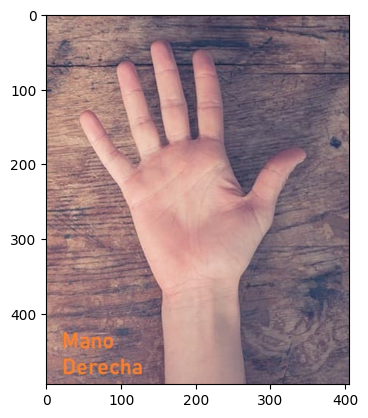

In [3]:
drawing = mp.solutions.drawing_utils
hands = mp.solutions.hands

with hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
    image = cv2.imread('figuras/mano_derecha.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = hands.process(cv2.flip(image, 1))
    print('Handedness:', results.multi_handedness)   
    plt.imshow(image)
    plt.show()


In [4]:
drawing = mp.solutions.drawing_utils
hands = mp.solutions.hands

with hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
    image = cv2.imread('figuras/mano_derecha.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(cv2.flip(image, 1))

print('Hand landmarks', results.multi_hand_landmarks)   


Hand landmarks [landmark {
  x: 0.496645868
  y: 0.709997058
  z: 7.91663297e-07
}
landmark {
  x: 0.368302584
  y: 0.639390588
  z: -0.0536623225
}
landmark {
  x: 0.297142178
  y: 0.526951075
  z: -0.0771638304
}
landmark {
  x: 0.254678965
  y: 0.435357153
  z: -0.0972240493
}
landmark {
  x: 0.185246408
  y: 0.385299
  z: -0.117706031
}
landmark {
  x: 0.46021378
  y: 0.383369744
  z: -0.0307014268
}
landmark {
  x: 0.464049488
  y: 0.261963367
  z: -0.0638538301
}
landmark {
  x: 0.473583341
  y: 0.186015308
  z: -0.0974190831
}
landmark {
  x: 0.487245321
  y: 0.123038352
  z: -0.125378132
}
landmark {
  x: 0.554046631
  y: 0.38664785
  z: -0.0383654423
}
landmark {
  x: 0.583386
  y: 0.252583802
  z: -0.0674442798
}
landmark {
  x: 0.606763363
  y: 0.166519314
  z: -0.101143666
}
landmark {
  x: 0.625928164
  y: 0.0958346725
  z: -0.128004521
}
landmark {
  x: 0.631493092
  y: 0.418902695
  z: -0.0551723279
}
landmark {
  x: 0.684126198
  y: 0.29748112
  z: -0.0959702805
}
landm

I0000 00:00:1758814526.088258   19265 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1758814526.090339   19349 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
W0000 00:00:1758814526.124804   19342 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758814526.140578   19341 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


I0000 00:00:1758815812.679724   19265 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1758815812.684874   20285 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
W0000 00:00:1758815812.708828   20278 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758815812.720990   20280 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Distancias Y: 0.6376813650131226 0.504181906580925 0.5397071838378906 0.5100174099206924 0.4362605810165405
Papel


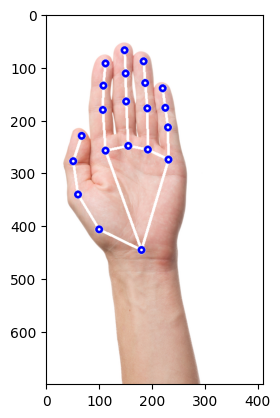

In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
    file = 'figuras/papel.png'
    image = cv2.flip(cv2.imread(file), 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0,0,255), thickness=3, circle_radius=5),
                mp_drawing.DrawingSpec(color=(255,255,255), thickness=4)
            )

            y0  = hand_landmarks.landmark[0].y
            y8  = hand_landmarks.landmark[8].y
            y12 = hand_landmarks.landmark[12].y
            y16 = hand_landmarks.landmark[16].y
            y20 = hand_landmarks.landmark[20].y

            # Distancias solo en eje Y
            d0 = y0
            d8  = abs(y8  - y0)
            d12 = abs(y12 - y0)
            d16 = abs(y16 - y0)
            d20 = abs(y20 - y0)

            print("Distancias Y:", d0, d8, d12, d16, d20)

            # ---- Lógica piedra, papel o tijera ----
            if d8 < 0.40 and d12 < 0.40 and d16 < 0.40 and d20 < 0.40:
                print("Piedra")
            elif d8 > 0.2 and d12 > 0.2 and d16 > 0.2 and d20 > 0.2:
                print("Papel")
            elif d8 > 0.2 and d12 > 0.2 and d16 < 0.40 and d20 < 0.40:
                print("Tijera")
            else:
                print("No se reconoce")

    plt.imshow(image)
    plt.show()


In [2]:
import cv2
import mediapipe as mp
import random
import time

drawing = mp.solutions.drawing_utils
hands = mp.solutions.hands
h = hands.Hands()
Piedra = 100
Papel = 101
Tijera = 102

cap = cv2.VideoCapture(0)

# Variables de control
texto = "..."
texto_ia = "IA: ..."
resultado = ""
mostrar_resultado = False
tiempo_inicio = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    img = frame.copy()
    fraccion = 1
    image = cv2.resize(img, (0,0), fx=fraccion, fy=fraccion, interpolation=cv2.INTER_NEAREST)
    image = cv2.cvtColor(cv2.flip(image,1), cv2.COLOR_BGR2RGB)
    results = h.process(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    texto = "..."

    if results.multi_hand_landmarks:
        for h_landmark in results.multi_hand_landmarks:
            drawing.draw_landmarks(
                image,
                h_landmark, hands.HAND_CONNECTIONS,
                landmark_drawing_spec=drawing.DrawingSpec(color=(0,0,150),circle_radius=4,thickness=4),
                connection_drawing_spec=drawing.DrawingSpec(color=(150,150,0),thickness=4) 
            )
            
            y0  = h_landmark.landmark[0].y
            y8  = h_landmark.landmark[8].y
            y12 = h_landmark.landmark[12].y
            y16 = h_landmark.landmark[16].y
            y20 = h_landmark.landmark[20].y

            # Distancias en eje Y
            d8  = abs(y8  - y0)
            d12 = abs(y12 - y0)
            d16 = abs(y16 - y0)
            d20 = abs(y20 - y0)

            # ---- Lógica piedra, papel o tijera ----
            if d8 < 0.40 and d12 < 0.40 and d16 < 0.40 and d20 < 0.40:
                texto = "Piedra"
            elif d8 > 0.2 and d12 > 0.2 and d16 > 0.2 and d20 > 0.2:
                texto = "Papel"
            elif d8 > 0.2 and d12 > 0.2 and d16 < 0.40 and d20 < 0.40:
                texto = "Tijera"

    # Detectar tecla R
    key = cv2.waitKey(1) & 0xFF
    if key == ord('r'):
        if texto in ["Piedra", "Papel", "Tijera"]:
            jugada_ia = random.randint(100, 102)
            if jugada_ia == 100:
                texto_ia = "IA: Piedra"
            elif jugada_ia == 101:
                texto_ia = "IA: Papel"
            elif jugada_ia == 102:
                texto_ia = "IA: Tijera"
            
            # --- Quién gana ---
            if (texto == "Piedra" and "Tijera" in texto_ia) or \
               (texto == "Papel" and "Piedra" in texto_ia) or \
               (texto == "Tijera" and "Papel" in texto_ia):
                resultado = "Ganaste!"
            elif (texto == "Piedra" and "Papel" in texto_ia) or \
                 (texto == "Papel" and "Tijera" in texto_ia) or \
                 (texto == "Tijera" and "Piedra" in texto_ia):
                resultado = "Perdiste!"
            else:
                resultado = "Empate!"
            
            mostrar_resultado = True
            tiempo_inicio = time.time()

    # Verificar si pasaron 3 segundos
    if mostrar_resultado and time.time() - tiempo_inicio > 3:
        texto_ia = "IA: ..."
        resultado = ""
        mostrar_resultado = False

    # Mostrar en pantalla
    image_flipped = cv2.flip(image,1)
    cv2.putText(image_flipped, f"Jugador: {texto}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                1, (255,255,255), 2, cv2.LINE_AA)
    cv2.putText(image_flipped, texto_ia, (350, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                1, (0,0,255), 2, cv2.LINE_AA)
    cv2.putText(image_flipped, resultado, (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 
                1.5, (0,255,255), 3, cv2.LINE_AA)

    cv2.imshow("Hand Tracking", image_flipped)

    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


I0000 00:00:1758818812.264078   22232 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1758818812.267459   22279 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1758818812.298689   22273 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758818812.325307   22269 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758818814.691465   22270 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
